# PNSol Data Analysis
dataset2.csv (provided)
- This is a more complex dataset where the (again synthetic) network conditions are piecewise time-stationary and represent varying network path properties.
 
<i> April 22. 2023 </i> <br>
<i> completed by Irina White </i>
<hr>

## Part I
Delay / Loss overview over time.

In [127]:
# obtain required libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warning messages'
import matplotlib.pyplot as plt
import seaborn as sns

#upload dataset
data=pd.read_csv('dataset2.csv')
data.head()

,time,size,AtoB,AtoC,AtoD
0,0.00000,818,0.039989,0.039994,0.067216
1,0.10225,1154,0.049004,0.049014,0.088323
2,0.24650,770,0.066513,0.066517,0.126332
3,0.34275,818,0.056480,0.056485,0.082139
4,0.44500,914,0.047772,0.047779,0.105486


Initial analysis of the data:
- statistical data for time delay between observation points
- visual representation of the delays/losses of individual test packets
- dropped packets summary

In [128]:
data.describe()

,time,size,AtoB,AtoC,AtoD
count,1500.000000,1500.000000,1496.000000,1496.000000,1491.000000
mean,73.811083,784.816000,0.036983,0.036989,0.099415
std,42.526837,429.650873,0.014298,0.014298,0.109673
min,0.000000,50.000000,0.015100,0.015105,0.040149
25%,36.582687,386.000000,0.024819,0.024827,0.062076
50%,73.705375,770.000000,0.034885,0.034892,0.087722
75%,110.141063,1154.000000,0.048172,0.048177,0.102872
max,147.068750,1490.000000,0.067473,0.067477,0.880089


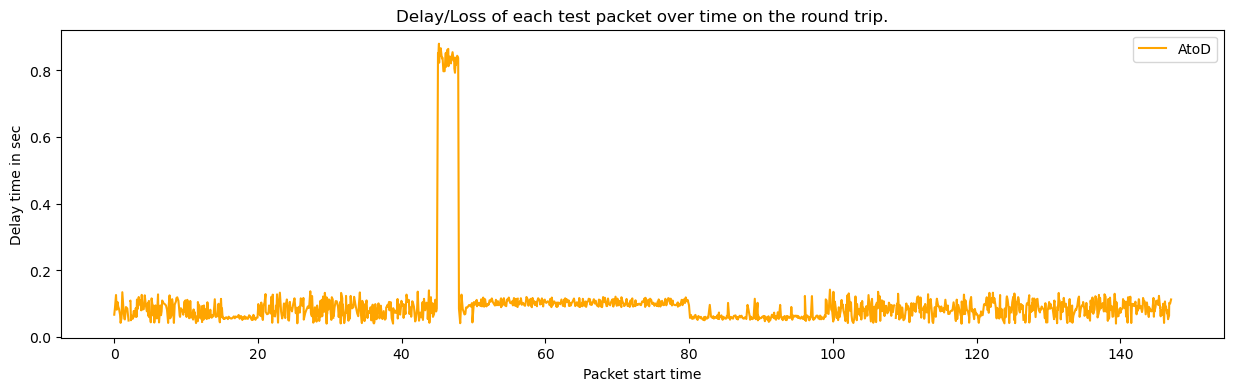

In [129]:
plt.figure(figsize=(15, 4))
plt.plot(data['time'], data['AtoD'], color='orange', label='AtoD')
plt.legend()
plt.title('Delay/Loss of each test packet over time on the round trip.')
plt.xlabel('Packet start time')
plt.ylabel('Delay time in sec')
plt.show()

In [130]:
# identify NA values in the dataset
data_na=data[data.isna().any(axis=1)].reset_index(drop=True)
data_na

,time,size,AtoB,AtoC,AtoD
0,2.15850,674,NaN,NaN,NaN
1,12.14475,626,0.030967,0.030971,NaN
2,30.54075,98,NaN,NaN,NaN
3,35.49675,338,NaN,NaN,NaN
4,39.25600,1106,0.024256,0.024260,NaN
5,56.25350,530,NaN,NaN,NaN
6,108.67850,674,0.047315,0.047320,NaN
7,126.70625,626,0.021629,0.021632,NaN
8,141.31775,98,0.037551,0.037552,NaN


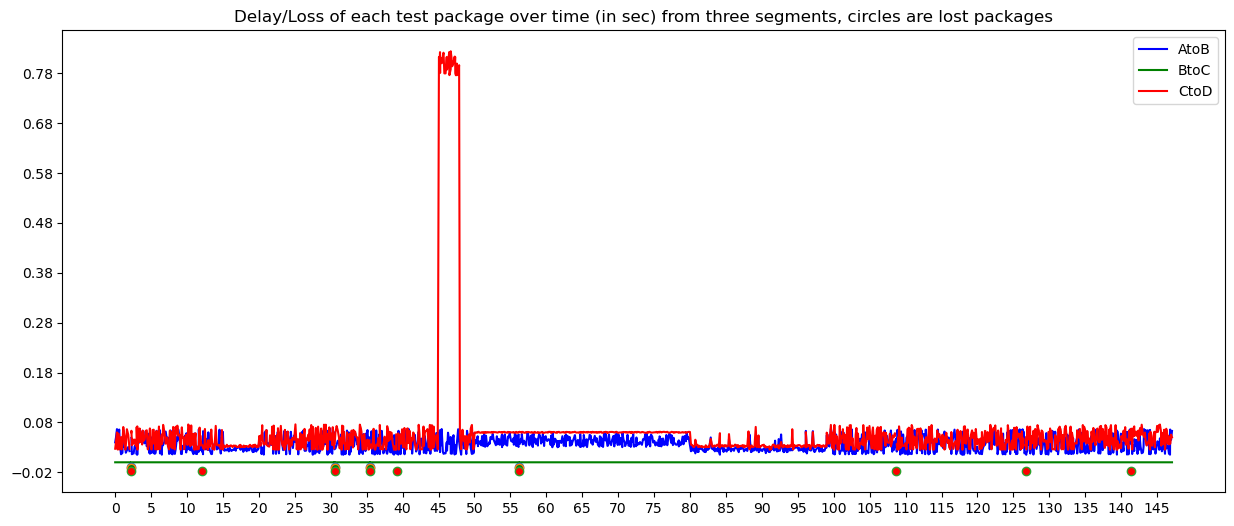

In [188]:
# visual representation of the packets Delay/Loss in 3 segments:

#create value of delays/losses between observation points
data['BtoC']=data['AtoC']-data['AtoB']
data['CtoD']=data['AtoD']-data['AtoC']

plt.figure(figsize=(15, 6))
data_naAB=data[data['AtoB'].isnull()]
data_naBC=data[data['BtoC'].isnull()]
data_naCD=data[data['CtoD'].isnull()]
data_naAB=data_naAB[['time', 'size', 'AtoB']]
data_naBC=data_naBC[['time', 'size', 'BtoC']]
data_naCD=data_naCD[['time', 'size', 'CtoD']]
data_naAB.fillna(-0.01, inplace=True)
data_naBC.fillna(-0.012, inplace=True)
data_naCD.fillna(-0.018, inplace=True)
plt.plot(data['time'], data['AtoB'], color='blue', label='AtoB')
plt.plot(data['time'], data['BtoC'], color='green', label='BtoC')
plt.plot(data['time'], data['CtoD'], color='red', label='CtoD')
plt.plot(data_naAB['time'], data_naAB['AtoB'], linestyle='None', marker="o", markerfacecolor="blue")
plt.plot(data_naBC['time'], data_naBC['BtoC'], linestyle='None', marker="o", markerfacecolor="green")
plt.plot(data_naCD['time'], data_naCD['CtoD'], linestyle='None', marker="o", markerfacecolor="red")
plt.xticks(np.arange(0, 150, 5))
plt.yticks(np.arange(-0.02, 0.8, 0.1))

plt.legend()
plt.title('Delay/Loss of each test packet over time (in sec) from three segments, circles are lost packets')
plt.show()

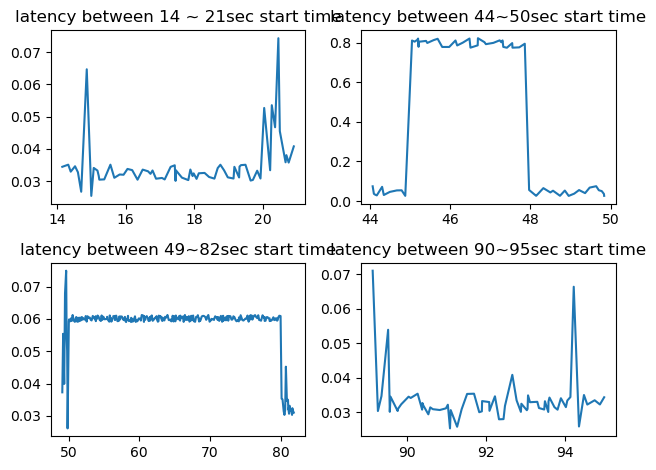

In [ ]:
#Four sections: 15~20sec, 45~47sec, 47~80sec, 80~100sec time-marks are required deeper analysis:

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot('time', 'CtoD', data= data.loc[(data['time'] >= 14) & (data['time'] <= 21)])
axs[0, 0].set_title("latency between 14 ~ 21sec start time")

axs[0, 1].plot('time', 'CtoD', data=data.loc[(data['time'] >= 44) & (data['time'] <= 50)] )
axs[0, 1].set_title("latency between 44~50sec start time")

axs[1, 0].plot('time', 'CtoD', data=data.loc[(data['time'] >= 49) & (data['time'] <= 82)] )
axs[1, 0].set_title("latency between 49~82sec start time")

axs[1, 1].plot('time', 'CtoD', data= data.loc[(data['time'] >= 89) & (data['time'] <= 95)])
axs[1, 1].set_title("latency between 90~95sec start time")

fig.tight_layout()

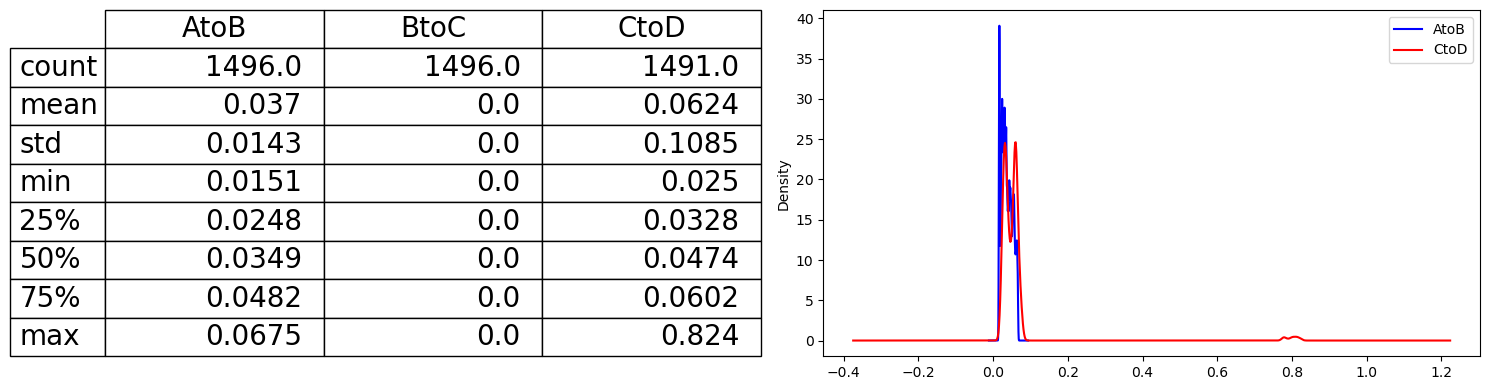

In [134]:
# KDE plot to see the distribution of observations between point.
# using bandwith of 0.05 to smooth the noise.
# skip BtoC segment for better visualis

stat=round(data[['AtoB','BtoC','CtoD']].describe(),4)

fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
bbox = [0, 0, 1, 1]
ax1.axis('off')
stat_table = ax1.table(cellText=stat.values, rowLabels=stat.index, bbox=bbox, colLabels=stat.columns)
stat_table.set_fontsize(20)

ax2 = fig.add_subplot(122)
data['AtoB'].plot.kde(bw_method=0.05, color='blue', label='AtoB')
data['CtoD'].plot.kde(bw_method=0.05, color='red', label='CtoD')

plt.tight_layout()
plt.legend()

plt.show()

In [135]:
#calculate local means, considering the bimodal form of the CtoD distribution.
print(data.loc[(data['CtoD'] < 0.046)].mean()['CtoD'], data.loc[(data['CtoD'] >= 0.046)].mean()['CtoD'])

0.0329801990242279 0.09019023177146807


### <b> Observational notes:</b>

Initial visual representation:
- the second dataset clearly represents more stationary time series (does not have clear trend, the variance is almost constant over time) especially for AtoB segment.
- the represenation of the segments shows that the piecewise component is added by the CtoD segment.

Packet loss: 0.27% upstream; 0.33% dowsntream: overall 0.6% packet loss:
- AtoB upstream, 4 packets dropped, potentially due to congestion/ ethernet.
- CtoD downstream, 5 dropped packets: 
     * 15~20sec mark have very little network jitter, straight after a downstream packet loss; can be a minor reset.
     * 45~48sec mark have a high jump in delay: router trouble/ high network congestion; can explain two previously lost downstream packets.
     * 50~80sec mark very stationary/ almost no noise segment: route changed/ router reset/ empty caches, etc.; can explain no packet loss for over 60sec after reset.


Statistically: 
* min $\Delta Q$ for AtoB and CtoD:   0.0151 vs. 0.025
* average $\Delta Q$ for AtoB:  0.037, however vs. CtoD bimodal distribution (becuase of spike) shows presence of two groups, it is more meaningful to consider two separate means: 0.03 and 0.09;
<hr>

## Part II
Delay /Loss overview with respect to packet size.

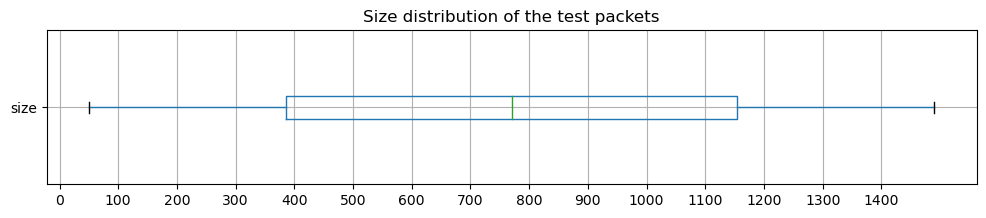

In [136]:
#quick overview of the size distribution of the test packets
plt.figure(figsize=(12, 2))
data.boxplot(column='size', figsize=(4, 3), vert=False)
plt.title('Size distribution of the test packets')
plt.xticks(np.arange(0, 1500, 100))
plt.show()

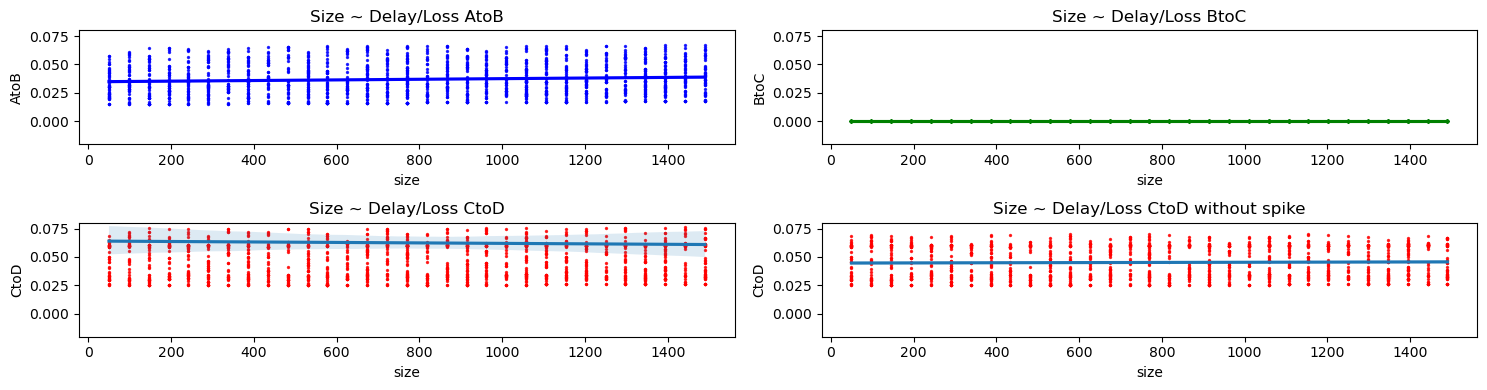

In [151]:
# visualisation of the delay/loss packets per size using line of the best fit

plt.figure(figsize=(15, 4))

plt.subplot(2,2,1)
plt.title('Size ~ Delay/Loss AtoB')
sns.regplot(x='size', y='AtoB', data=data, color='blue', scatter_kws={'s':2})
plt.plot(data_naAB['size'], data_naAB['AtoB'], linestyle='None', marker="o", markerfacecolor="blue")
plt.ylim(-0.02, 0.08)

plt.subplot(2,2,2)
plt.title('Size ~ Delay/Loss BtoC')
sns.regplot(x='size', y='BtoC', data=data, color='green', scatter_kws={'s':2})
plt.plot(data_naAB['size'], data_naAB['AtoB'], linestyle='None', marker="o", markerfacecolor="blue")
plt.ylim(-0.02, 0.08)

plt.subplot(2,2,3)
plt.title('Size ~ Delay/Loss CtoD')
sns.regplot(x='size', y='CtoD', data=data, scatter_kws={"color": "red", 's':2})
plt.ylim(-0.02, 0.08)

plt.subplot(2,2,4)
plt.title('Size ~ Delay/Loss CtoD without spike')
sns.regplot(x='size', y='CtoD', data=data.loc[data['CtoD'] <0.07] , scatter_kws={"color": "red", 's':2})
plt.ylim(-0.02, 0.08)

plt.tight_layout()
plt.show()

In [32]:
#calculate data for the linear regression line:
data_no_na=data.dropna(axis= 0, how='any')
from scipy import stats
slopeAB, interceptAB, r_value, p_value, std_err = stats.linregress(data_no_na['size'], data_no_na['AtoB'])
slopeCD, interceptCD, r_value, p_value, std_err = stats.linregress(data_no_na['size'], data_no_na['CtoD'])
print(f"Line of best fit for AtoB: slope {slopeAB} and y-intercept {interceptAB} \n \n\
Line of best fit for CtoD: slope {slopeCD} and y-intercept {interceptCD}")

Line of best fit for AtoB: slope 2.757581843489798e-06 and y-intercept 0.03483047035880551 
 
Line of best fit forCtoD: slope -2.0547350534984577e-06 and y-intercept 0.06402592501319349


### <b>Observational notes:</b>
- Packet sizes are well distributed.

- The visualisation of the delay/loss with respect to the packet size shows almost no effect the size is having on the delay/loss. Especially if one is to exclude the spike piece.

- Loss of three upstream packets are likely due to the variable delay $\Delta Q$<sub>|V</sub>: congestion. 

- Segment CtoD: the slope of the regression line is small, yet negative. Most likely it signifies $\Delta Q$<sub>|G</sub> geographic delay: physical layer transmission component; which can be the cause of additional 5 packets loss.

<hr>

## Part III
Further statistical analysis: CDF

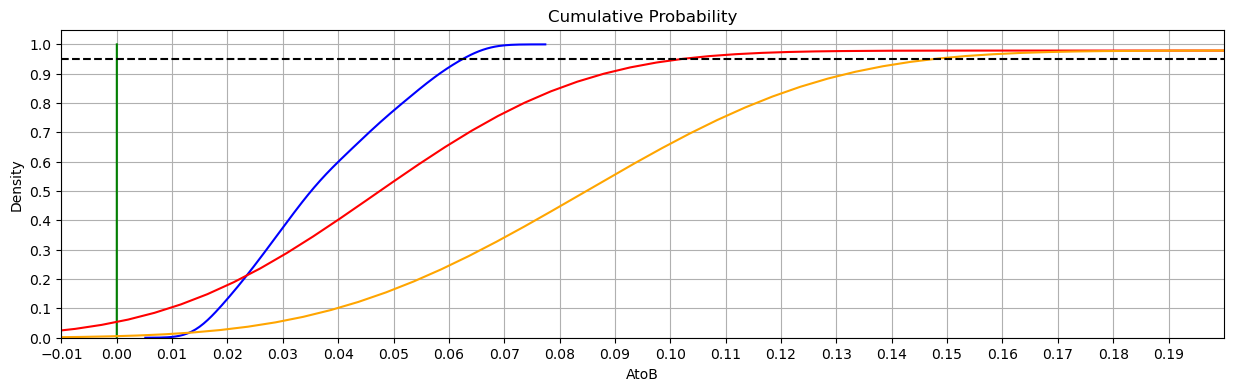

In [187]:
#Likelihood of occurance of each delay/loss.

fig, ax = plt.subplots(figsize=[15,4])
ax.get_title(loc="center")
ax.set_title('Cumulative Probability')

sns.kdeplot(data = data['AtoB'], cumulative = True, label = 'AtoB', color='blue')
sns.kdeplot(data = data['BtoC'], cumulative = True, label = 'BtoC', color='green')
sns.kdeplot(data = data['CtoD'], cumulative = True, label = 'CtoD', color='red')
sns.kdeplot(data = data['AtoD'], cumulative = True, label = 'AtoD', color='orange')
plt.axhline(y=0.95, color='black', ls='--')


ax.set_xlim(0, 0.20)
ax.set_xticks(np.arange(-0.01, 0.20, 0.01))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.grid()
plt.show()

### <b>Observational notes:</b>
<i> * 40~60ms latency is considered good with under 100ms is average accetable.</i>
- AtoB: 50% of the delays last for less than ~35ms, while 95% of the delays are less than ~60ms for packages up to 1.5kBit.

- CtoD: 50% of the delays last for less than ~47ms, while 95% of the delays are less than ~100ms.

- AtoD: 50% of the delays last for less than ~85ms, while 95% of the delays are less than ~150ms.
<hr>

### Conclusion: 
The situation is mostly affected by downstream performance. While upstream and server responce is in the acceptable delay/loss range, the downstream situation is slightly different. The performance has solid results after the reset (45~48sec) for about 30sec, however the network jitter returned back after that with the loss of three packets. It is possible that the physical component is at fault and maybe should be replaced to maintain more stable level of performance.